In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
import warnings
warnings.filterwarnings("ignore")


# Load the data and Display structure,summary report.

In [6]:
data=pd.read_csv(r"Z:\Second Semister\Machine Learning\datasets\IOT-temp.csv")
data

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In
...,...,...,...,...,...
97601,__export__.temp_log_91076_7fbd08ca,Room Admin,28-07-2018 07:07,31,In
97602,__export__.temp_log_147733_62c03f31,Room Admin,28-07-2018 07:07,31,In
97603,__export__.temp_log_100386_84093a68,Room Admin,28-07-2018 07:06,31,In
97604,__export__.temp_log_123297_4d8e690b,Room Admin,28-07-2018 07:06,31,In


In [7]:
data.head()

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97606 entries, 0 to 97605
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          97606 non-null  object
 1   room_id/id  97606 non-null  object
 2   noted_date  97606 non-null  object
 3   temp        97606 non-null  int64 
 4   out/in      97606 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.7+ MB


In [9]:
data.shape

(97606, 5)

# Check the attributes data types and Drop out unwanted columns like id , room_id.

In [10]:
data.dtypes

id            object
room_id/id    object
noted_date    object
temp           int64
out/in        object
dtype: object

In [11]:
data = data.drop(columns=['id', 'room_id/id'])
data

,noted_date,temp,out/in
0,08-12-2018 09:30,29,In
1,08-12-2018 09:30,29,In
2,08-12-2018 09:29,41,Out
3,08-12-2018 09:29,41,Out
4,08-12-2018 09:29,31,In
...,...,...,...
97601,28-07-2018 07:07,31,In
97602,28-07-2018 07:07,31,In
97603,28-07-2018 07:06,31,In
97604,28-07-2018 07:06,31,In


# Check for missing values in any of the columns.


In [12]:
data.isnull().sum()

noted_date    0
temp          0
out/in        0
dtype: int64

# Separate out date and time values of noted_date column.

In [13]:
data['noted_date']=pd.to_datetime(data['noted_date'])

data['date'] = data['noted_date'].dt.date
data['time'] = data['noted_date'].dt.time

data

,noted_date,temp,out/in,date,time
0,2018-08-12 09:30:00,29,In,2018-08-12,09:30:00
1,2018-08-12 09:30:00,29,In,2018-08-12,09:30:00
2,2018-08-12 09:29:00,41,Out,2018-08-12,09:29:00
3,2018-08-12 09:29:00,41,Out,2018-08-12,09:29:00
4,2018-08-12 09:29:00,31,In,2018-08-12,09:29:00
...,...,...,...,...,...
97601,2018-07-28 07:07:00,31,In,2018-07-28,07:07:00
97602,2018-07-28 07:07:00,31,In,2018-07-28,07:07:00
97603,2018-07-28 07:06:00,31,In,2018-07-28,07:06:00
97604,2018-07-28 07:06:00,31,In,2018-07-28,07:06:00


In [14]:
data=data.drop(columns=['noted_date'])
data

,temp,out/in,date,time
0,29,In,2018-08-12,09:30:00
1,29,In,2018-08-12,09:30:00
2,41,Out,2018-08-12,09:29:00
3,41,Out,2018-08-12,09:29:00
4,31,In,2018-08-12,09:29:00
...,...,...,...,...
97601,31,In,2018-07-28,07:07:00
97602,31,In,2018-07-28,07:07:00
97603,31,In,2018-07-28,07:06:00
97604,31,In,2018-07-28,07:06:00


# Further separate date,month,year from date and store as separate columns. Display the 	complete data with new columns.


In [15]:
data['date'] = pd.to_datetime(data['date'])

data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

data

,temp,out/in,date,time,year,month,day
0,29,In,2018-08-12,09:30:00,2018,8,12
1,29,In,2018-08-12,09:30:00,2018,8,12
2,41,Out,2018-08-12,09:29:00,2018,8,12
3,41,Out,2018-08-12,09:29:00,2018,8,12
4,31,In,2018-08-12,09:29:00,2018,8,12
...,...,...,...,...,...,...,...
97601,31,In,2018-07-28,07:07:00,2018,7,28
97602,31,In,2018-07-28,07:07:00,2018,7,28
97603,31,In,2018-07-28,07:06:00,2018,7,28
97604,31,In,2018-07-28,07:06:00,2018,7,28


In [16]:
data=data.drop(columns=['date'])
data

,temp,out/in,time,year,month,day
0,29,In,09:30:00,2018,8,12
1,29,In,09:30:00,2018,8,12
2,41,Out,09:29:00,2018,8,12
3,41,Out,09:29:00,2018,8,12
4,31,In,09:29:00,2018,8,12
...,...,...,...,...,...,...
97601,31,In,07:07:00,2018,7,28
97602,31,In,07:07:00,2018,7,28
97603,31,In,07:06:00,2018,7,28
97604,31,In,07:06:00,2018,7,28


### before plotting we sepreate oqt data in two different dataframes


# Converting 'In' to '1' and 'Out' to '0'

In [17]:
data_in= data.replace('In',1)
data_out= data.replace('Out',0)
data

,temp,out/in,time,year,month,day
0,29,In,09:30:00,2018,8,12
1,29,In,09:30:00,2018,8,12
2,41,Out,09:29:00,2018,8,12
3,41,Out,09:29:00,2018,8,12
4,31,In,09:29:00,2018,8,12
...,...,...,...,...,...,...
97601,31,In,07:07:00,2018,7,28
97602,31,In,07:07:00,2018,7,28
97603,31,In,07:06:00,2018,7,28
97604,31,In,07:06:00,2018,7,28


### 1 : based on Inside temperature

In [18]:
data_in.reset_index(drop = True)
data

,temp,out/in,time,year,month,day
0,29,In,09:30:00,2018,8,12
1,29,In,09:30:00,2018,8,12
2,41,Out,09:29:00,2018,8,12
3,41,Out,09:29:00,2018,8,12
4,31,In,09:29:00,2018,8,12
...,...,...,...,...,...,...
97601,31,In,07:07:00,2018,7,28
97602,31,In,07:07:00,2018,7,28
97603,31,In,07:06:00,2018,7,28
97604,31,In,07:06:00,2018,7,28


### 2 : based on Outside temperature

In [19]:
data_out.reset_index(drop = True)
data

,temp,out/in,time,year,month,day
0,29,In,09:30:00,2018,8,12
1,29,In,09:30:00,2018,8,12
2,41,Out,09:29:00,2018,8,12
3,41,Out,09:29:00,2018,8,12
4,31,In,09:29:00,2018,8,12
...,...,...,...,...,...,...
97601,31,In,07:07:00,2018,7,28
97602,31,In,07:07:00,2018,7,28
97603,31,In,07:06:00,2018,7,28
97604,31,In,07:06:00,2018,7,28


# Plot of count of Inside and Outside

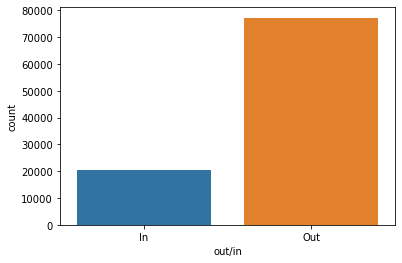

In [20]:
sns.countplot(data['out/in']);

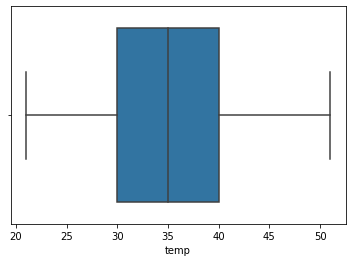

In [21]:
sns.boxplot(data['temp'])
plt.show()

### Inside temperature 

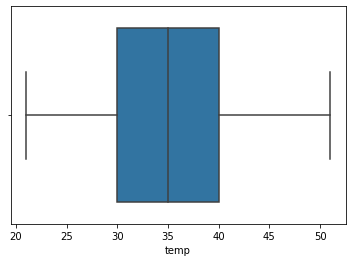

In [22]:
sns.boxplot(data_in['temp'])
plt.show()

### Outside temperature

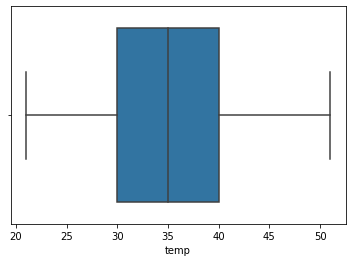

In [23]:
sns.boxplot(data_out['temp'])
plt.show()

# Prepare barplot for in/out vs temperature.

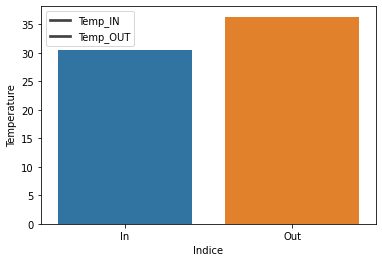

In [31]:
sns.barplot(data['out/in'],data['temp'])
plt.xlabel('Indice')
plt.ylabel('Temperature')
plt.legend(["Temp_IN", "Temp_OUT"])
plt.show()
